# V<sub>oc</sub> and V<sub>mp</sub> vs Irradiance and vs Temperature

This evaluation will use the Rich Solar 200W 12V panel

In [1]:
# Setup
import pvlib
from pvlib.pvsystem import PVSystem, Array, FixedMount
from pvlib.location import Location
from pvlib.modelchain import ModelChain
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import solarpanels
import pprint

In [2]:
rich_solar_12V_params = solarpanels.get_rich_solar_MEGA200_12V()
pprint.pprint(rich_solar_12V_params)

{'A_c': 2.188,
 'Adjust': -79.99107249350025,
 'Bifacial': 0,
 'I_L_ref': 10.205721595216158,
 'I_mp_ref': 9.8,
 'I_o_ref': 3.7270352410878284e-16,
 'I_sc_ref': 10.2,
 'Isat1_T0': 2.28618816125344e-11,
 'Isat2_T0': 1.117455042372326e-06,
 'Length': 1.49,
 'N_s': 36,
 'Name': 'Rich Solar MEGA200',
 'PTC': 178.5,
 'Parallel_strings': 1,
 'R_s': 0.17451862762241224,
 'R_sh_ref': 311.11777951831857,
 'Rs_2d': 0.004267236774264931,
 'Rsh_2d': 10.01226369025448,
 'STC': 200.0862,
 'T_NOCT': 45,
 'Technology': 'Mono-c-Si',
 'V_mp_ref': 20.4,
 'V_oc_ref': 24.3,
 'Width': 0.681,
 'a_ref': 0.6421603755096853,
 'alpha_sc': 0.00918,
 'alpha_sc_percent': 0.0009,
 'beta_oc': -0.12685,
 'cell_layout': [[[{'crosstie': False, 'idx': 0},
                   {'crosstie': False, 'idx': 1},
                   {'crosstie': False, 'idx': 2},
                   {'crosstie': False, 'idx': 3},
                   {'crosstie': False, 'idx': 4},
                   {'crosstie': False, 'idx': 5},
                   {

## V<sub>oc</sub> and V<sub>mp</sub> vs Irradiance

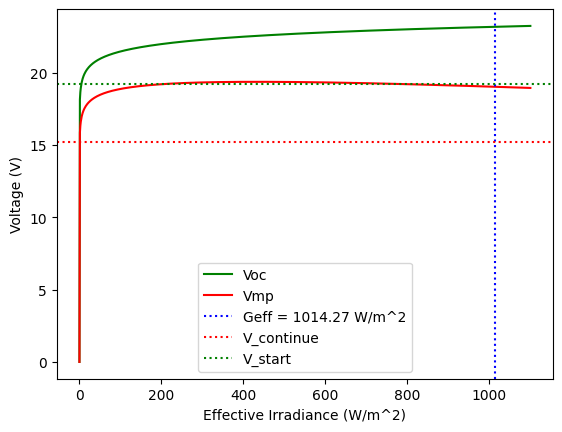

In [3]:
Temp = 68.78

Geff = np.linspace(0, 1100, 1000)

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s']
)

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(Geff,curve_info['v_oc'], label='Voc', color='g')
plt.plot(Geff,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Effective Irradiance (W/m^2)')
plt.ylabel('Voltage (V)')

#plot a vertical line at Geff = 1014.27 W/m^2
plt.axvline(x=1014.27, color='b', linestyle=':', label='Geff = 1014.27 W/m^2')

# plot a horizontal line at 15.2v for V_continue
plt.axhline(y=15.2, color='r', linestyle=':', label='V_continue')
# plot a horizontal line at 19.2v for V_start
plt.axhline(y=19.2, color='g', linestyle=':', label='V_start')
plt.legend()

## V<sub>oc</sub> and V<sub>mp</sub> vs Temperature

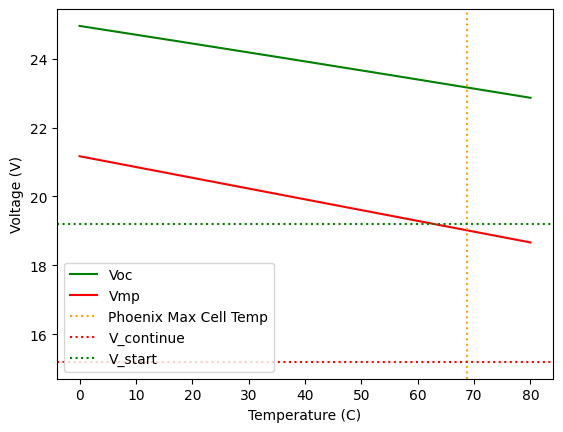

In [4]:
Temp = np.linspace(0, 80, 1000)

Geff = 1014.27

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s'],
    )

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(Temp,curve_info['v_oc'], label='Voc', color='g')
plt.plot(Temp,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (V)')
#plt.ylim(0, 25)

#plot a vertical line at 68.78C for T_continue
plt.axvline(x=68.78, color='orange', linestyle=':', label='Phoenix Max Cell Temp')

# plot a horizontal line at 15.2v for V_continue
plt.axhline(y=15.2, color='r', linestyle=':', label='V_continue')
# plot a horizontal line at 19.2v for V_start
plt.axhline(y=19.2, color='g', linestyle=':', label='V_start')
plt.legend()

## V<sub>oc</sub> vs P<sub>mp</sub>

P_start = 0.8013670743922708
Max Pmp = 192.42618086894095
Max Vmp = 19.359038849102465
Max Voc = 23.151855937570872


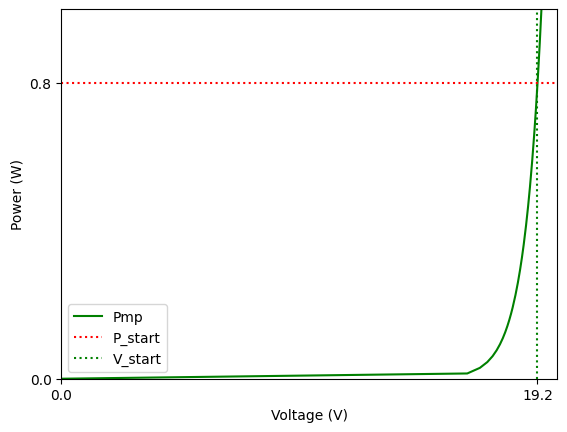

In [38]:
Temp = 68.78
#Temp = 25

Geff = np.linspace(0, 1000, 10000)

IL, I0, Rs, Rsh, nNsVth = pvlib.pvsystem.calcparams_desoto(
    Geff,
    Temp,
    alpha_sc=rich_solar_12V_params['alpha_sc'],
    a_ref=rich_solar_12V_params['a_ref'],
    I_L_ref=rich_solar_12V_params['I_L_ref'],
    I_o_ref=rich_solar_12V_params['I_o_ref'],
    R_sh_ref=rich_solar_12V_params['R_sh_ref'],
    R_s=rich_solar_12V_params['R_s']
)

# plug the parameters into the SDE and solve for IV curves:
SDE_params = {
    'photocurrent': IL,
    'saturation_current': I0,
    'resistance_series': Rs,
    'resistance_shunt': Rsh,
    'nNsVth': nNsVth
}

curve_info = pvlib.pvsystem.singlediode(method='lambertw', **SDE_params)

plt.figure()
plt.plot(curve_info['v_oc'], curve_info['p_mp'], label='Pmp', color='g')
#plt.plot(Geff,curve_info['v_mp'], label='Vmp', color='r')
#label the axes
plt.xlabel('Voltage (V)')
plt.ylabel('Power (W)')

v_start = 19.2

# find the index where v_oc exceeds 19.2v
idx = np.where(curve_info['v_oc'] > v_start)[0][0]

# find the p_mp point for idx
p_start = curve_info['p_mp'][idx]
print(f'P_start = {p_start}')

# find and print the max Pmp, Mac Vmp, and Max Voc
max_pmp = max(curve_info['p_mp'])
max_vmp = max(curve_info['v_mp'])
max_voc = max(curve_info['v_oc'])
print(f'Max Pmp = {max_pmp}')
print(f'Max Vmp = {max_vmp}')
print(f'Max Voc = {max_voc}')


# plot a horizontal line at p_mp for idx
plt.axhline(y=curve_info['p_mp'][idx], color='r', linestyle=':', label='P_start')

# add a tick to the y-axis at the the value of p_start
plt.yticks(list(plt.yticks()[0]) + [p_start])
#plt.text(0, p_start, f'{p_start:.2f}W', fontsize=12, ha='right')

# plot a vertical line at 19.2v for V_start
plt.axvline(x=v_start, color='g', linestyle=':', label='V_start')

# set the x-axis ticks to include v_start
plt.xticks([0, v_start])

# limit the x-axis to 0-25v
plt.xlim(0, 25)
# limit the y-axis to 0-20
plt.ylim(0, 1)

plt.legend()




# limit the x-axis to 0-25v
plt.xlim(0, 20)
# limit the y-axis to 0-20
plt.ylim(0, 1)

plt.legend()